In [1]:
import numpy as np 
import pandas as pd 


In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [11]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [12]:
df.shape

(1000, 8)

## DataSet Information
- 1000 records with 8 features

### Features:
- gender 
- race/ethnicity 
- parental level of education 
- lunch 
- test preparation course 
- math score 
- reading score
- writing score

In [14]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There are no missing values in the dataset

In [15]:
df.duplicated().sum()

0

#### There are no duplicate values in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Features:
- gender                        [CATEGORICAL]
- race/ethnicity                [CATEGORICAL]
- parental level of education   [CATEGORICAL]
- lunch                         [CATEGORICAL]
- test preparation course       [CATEGORICAL]
- math score                    [NUMERICAL]
- reading score                 [NUMERICAL]
- writing score                 [NUMERICAL]

In [5]:
    df.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

#### Observation
From above description of numerical data, all means are very close to each other - between 66 and 69.17.

All standard deviations are also close - between 14.6 and 15.19.

While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading most higher = 17.

In [6]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [15]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


print(f"We have {len(numeric_features)} numerical features : {numeric_features}\n")
print(f"We have {len(categorical_features)} categorical features : {categorical_features}\n")


for feature in categorical_features:
    print(f"Categories in {feature} variable:     ",end="\n" )
    print(df[feature].unique())
    print("\n")



We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

Categories in gender variable:     
['female' 'male']


Categories in race/ethnicity variable:     
['group B' 'group C' 'group A' 'group D' 'group E']


Categories in parental level of education variable:     
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Categories in lunch variable:     
['standard' 'free/reduced']


Categories in test preparation course variable:     
['none' 'completed']




In [17]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total score    average  
0          218  72.666667  
1          247  82.333333  
2          278  92.666667  
3          148  49.333333  
4          229  76.333333

In [35]:
math_full_cnt = df[df['math score'] == 100]['average'].count()
writing_full_cnt = df[df['writing score'] == 100]['average'].count()
reading_full_cnt = df[df['reading score'] == 100]['average'].count()

math_below20_cnt = df[df['math score'] <= 20]['average'].count()
writing_below20_cnt = df[df['writing score'] <= 20]['average'].count()
reading_below20_cnt = df[df['reading score'] <= 20]['average'].count()

In [33]:
print(f'Number of students with full marks in Maths: {math_full_cnt}')
print(f'Number of students with full marks in Writing: {writing_full_cnt}')
print(f'Number of students with full marks in Reading: {reading_full_cnt}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [34]:
print(f'Number of students with less than 20 marks in Maths: {math_below20_cnt}')
print(f'Number of students with less than 20 marks in Writing: {writing_below20_cnt}')
print(f'Number of students with less than 20 marks in Reading: {reading_below20_cnt}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#### Observation
From above values
- We get students have performed the worst in Maths; thus Maths being a tougher exam
- Best performance is in reading section; thus Reading being an easier exam

## Data Visualization 
- Average Score Distribution (Male v Female) Histogram

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Male v Female Total Scores'}, xlabel='total score', ylabel='Count'>

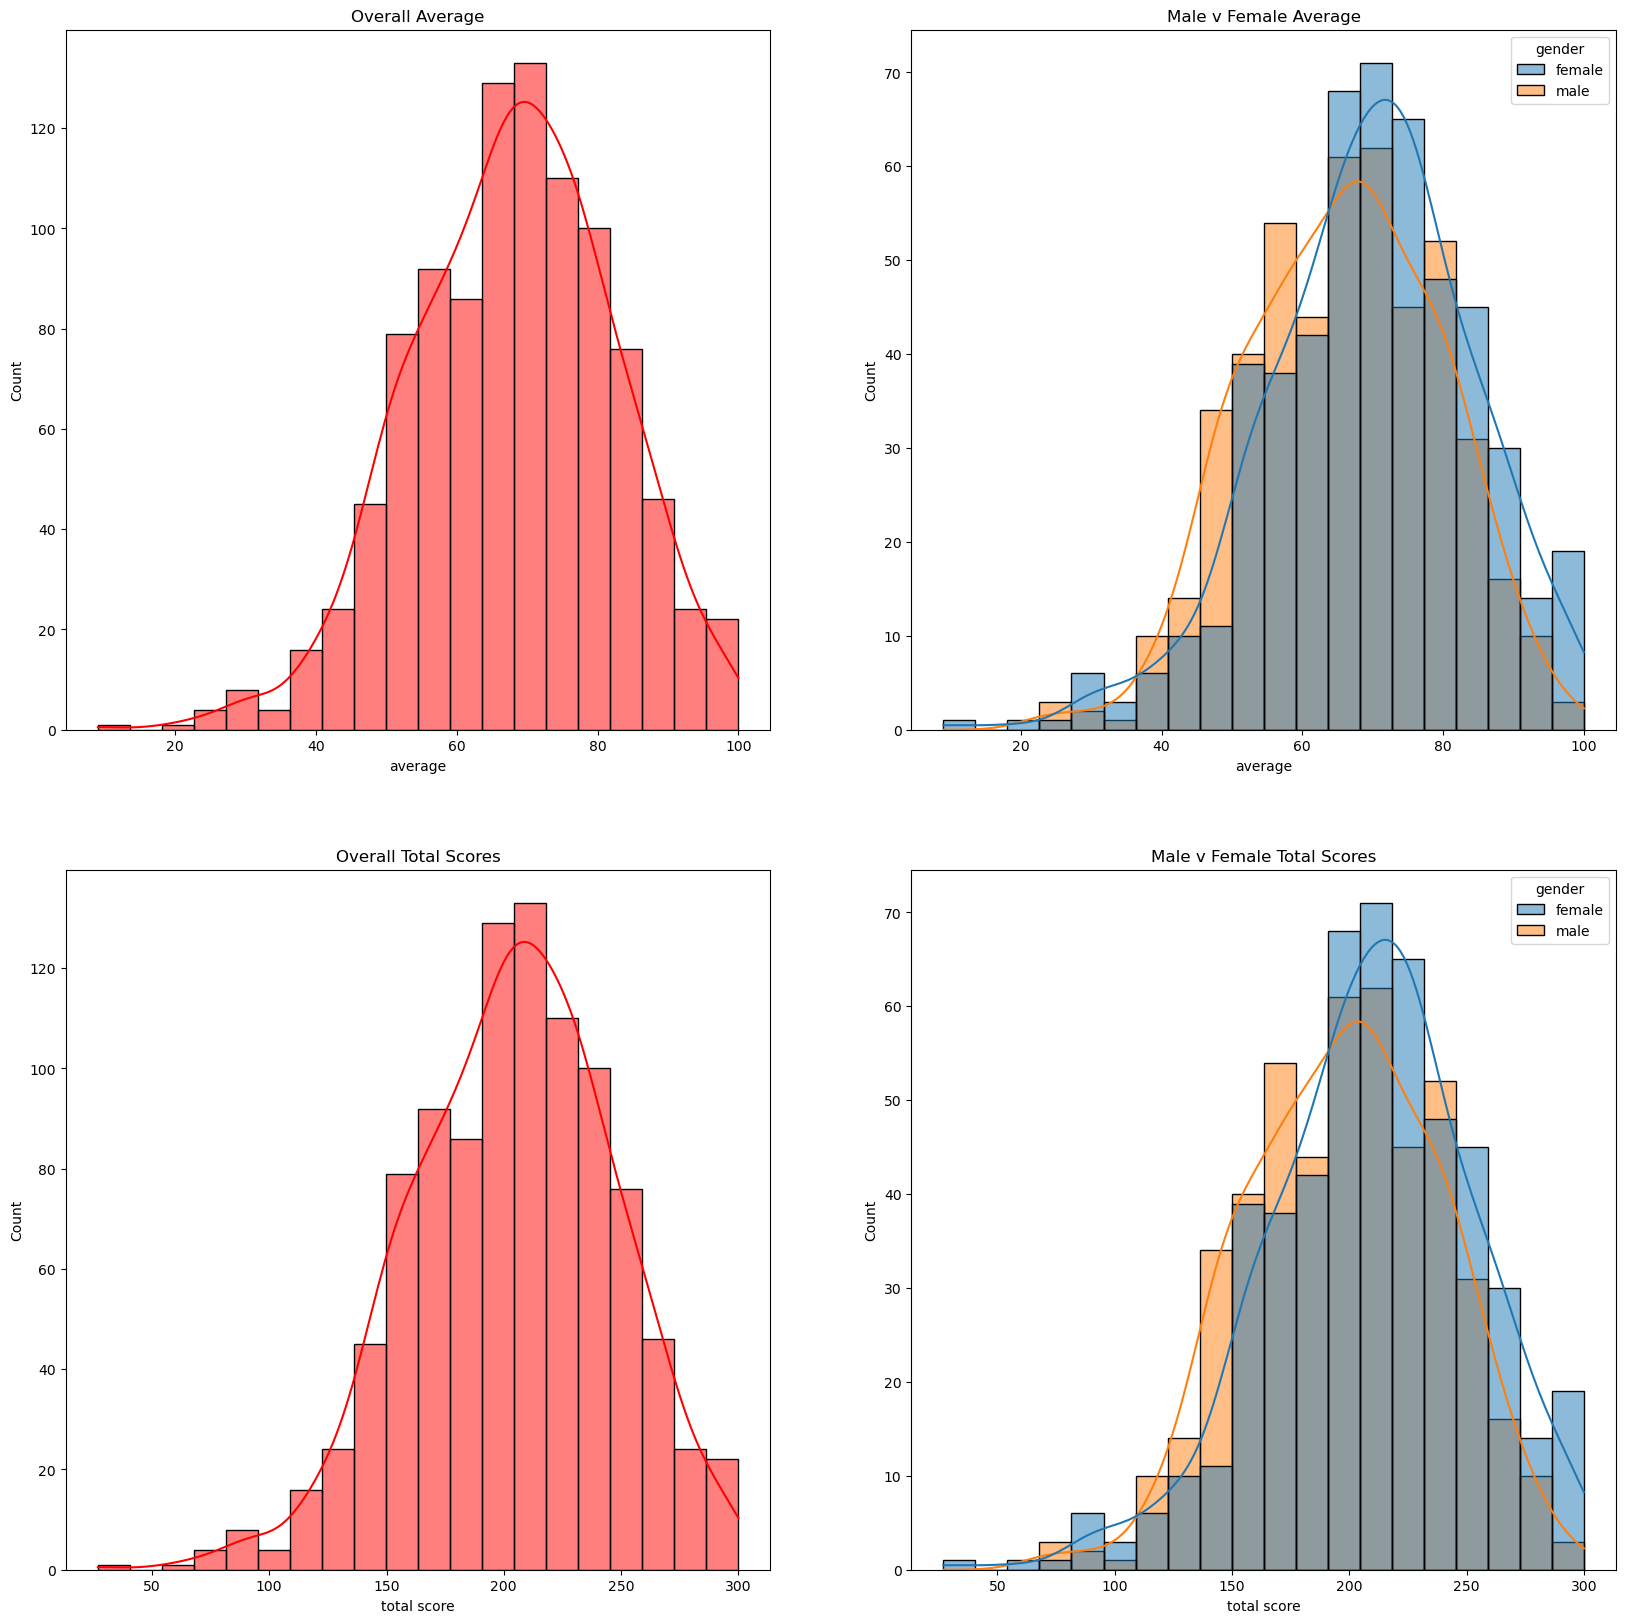

In [66]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
plt.subplot(221)
plt.title('Overall Average')
sns.histplot(data=df, x='average', bins=20, kde=True, color='r')
plt.subplot(222)
plt.title('Male v Female Average')
sns.histplot(data=df, x='average', bins=20, kde=True, hue='gender')
plt.subplot(223)
plt.title('Overall Total Scores')
sns.histplot(data=df, x='total score', bins=20, kde=True, color='r')
plt.subplot(224)
plt.title('Male v Female Total Scores')
sns.histplot(data=df, x='total score', bins=20, kde=True, hue='gender')


#### Observation
- Female students tend to perform well then male students.

### Average Score Distribution (Male v Female) based on Lunch type Histogram

<Axes: title={'center': 'Male Averages'}, xlabel='average', ylabel='Count'>

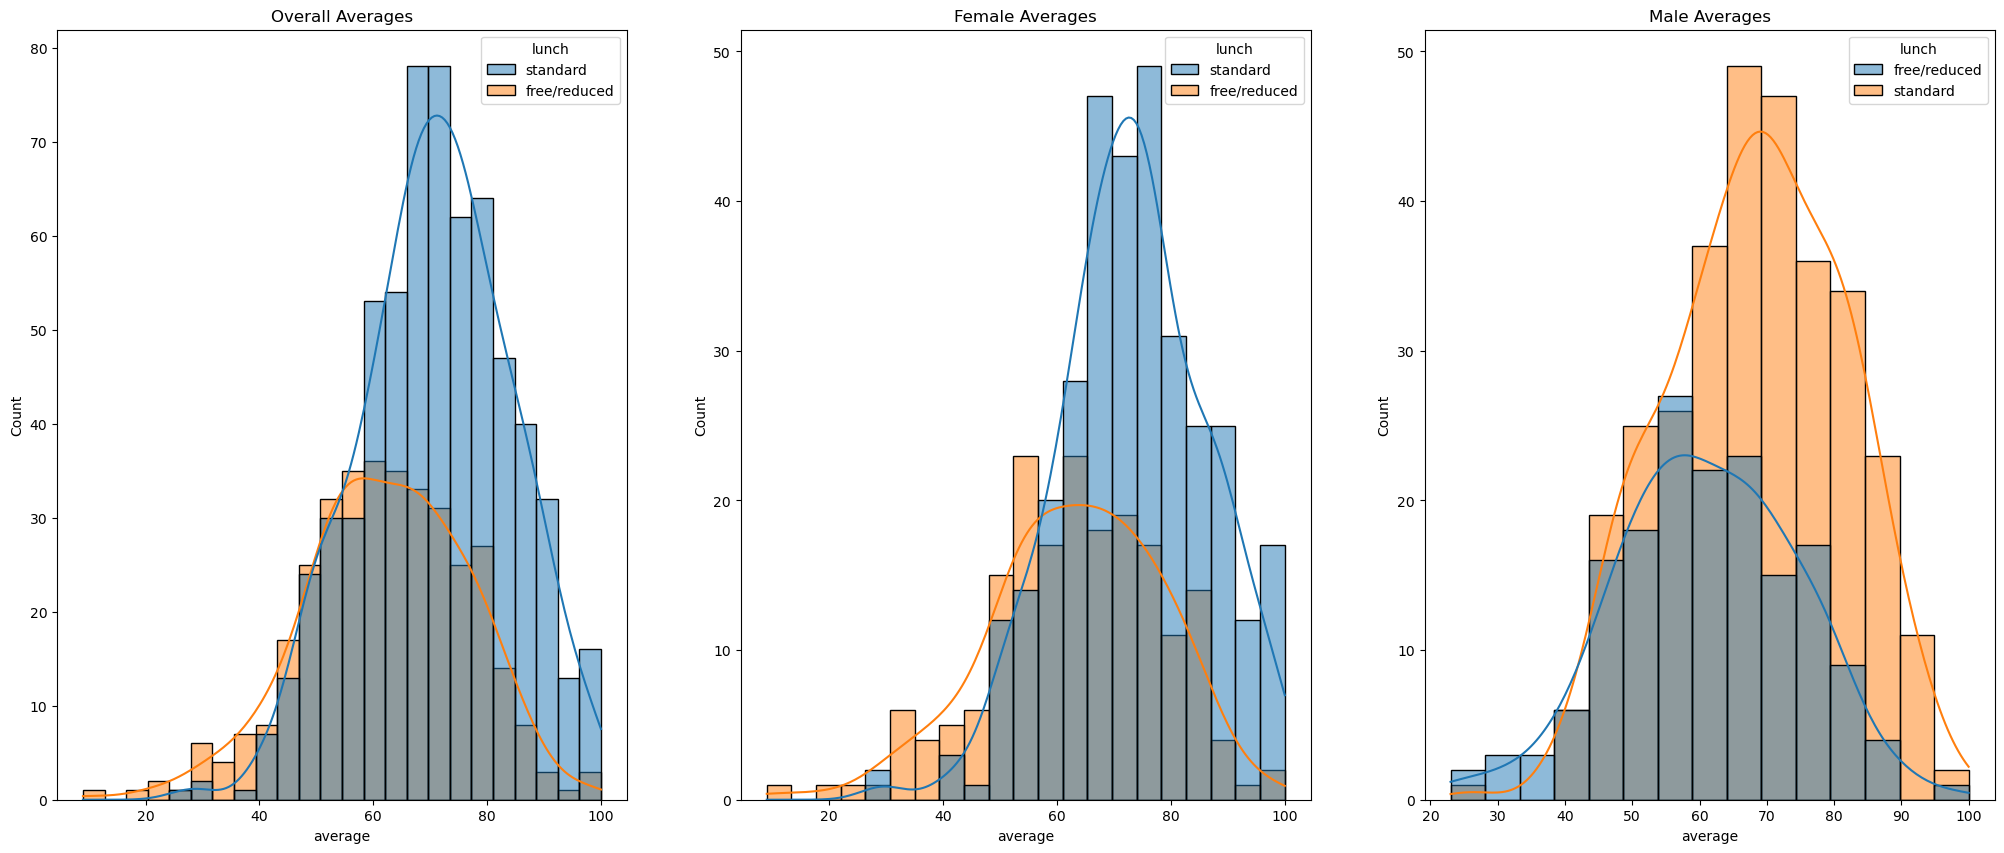

In [65]:
figs, axs = plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
plt.title("Overall Averages")
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
plt.title("Female Averages")
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
plt.title("Male Averages")
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')


#### Observation
- Standard lunch helps perform well in exams.
    - Standard lunch helps perform well in exams be it a male or a female.

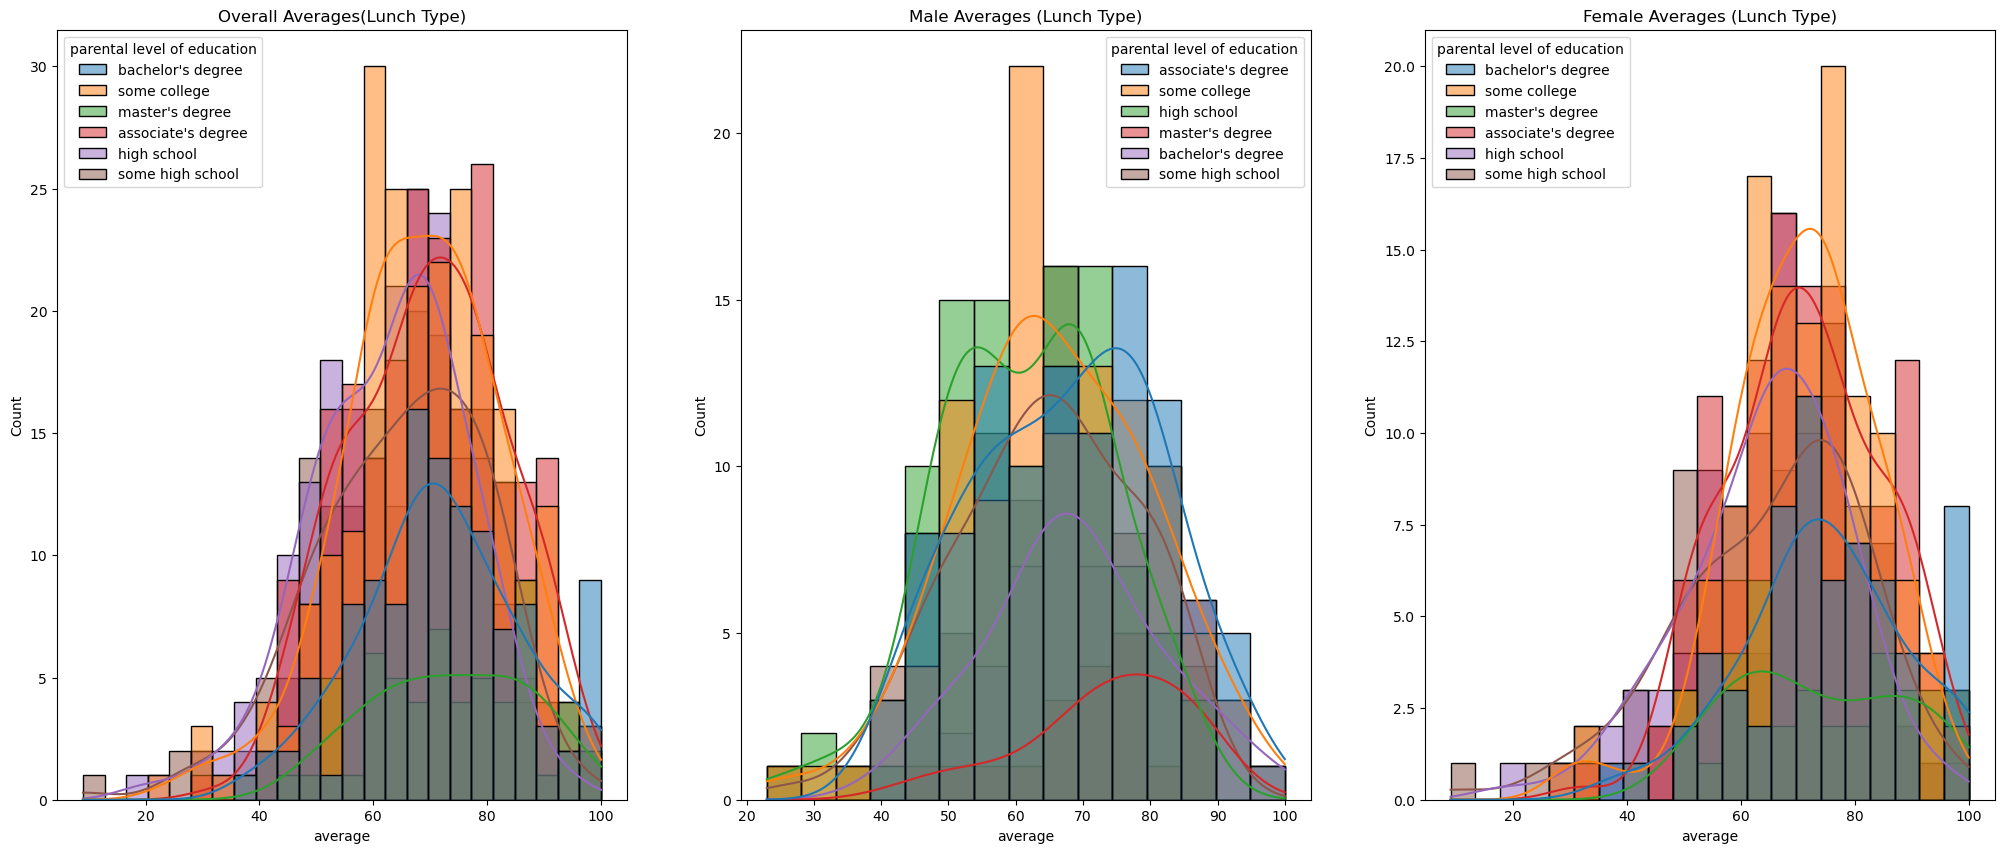

In [64]:
figs, axs = plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
plt.title('Overall Averages(Lunch Type)')
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.subplot(132)
plt.title('Male Averages (Lunch Type)')
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental level of education')
plt.subplot(133)
plt.title('Female Averages (Lunch Type)')
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental level of education')
plt.show()

#### Observation
- Overall Averages plot shows; in general parent's education don't help student perform well in exam.
- Male Averages plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- Female Averages plot we can see there is no effect of parent's education on female students.

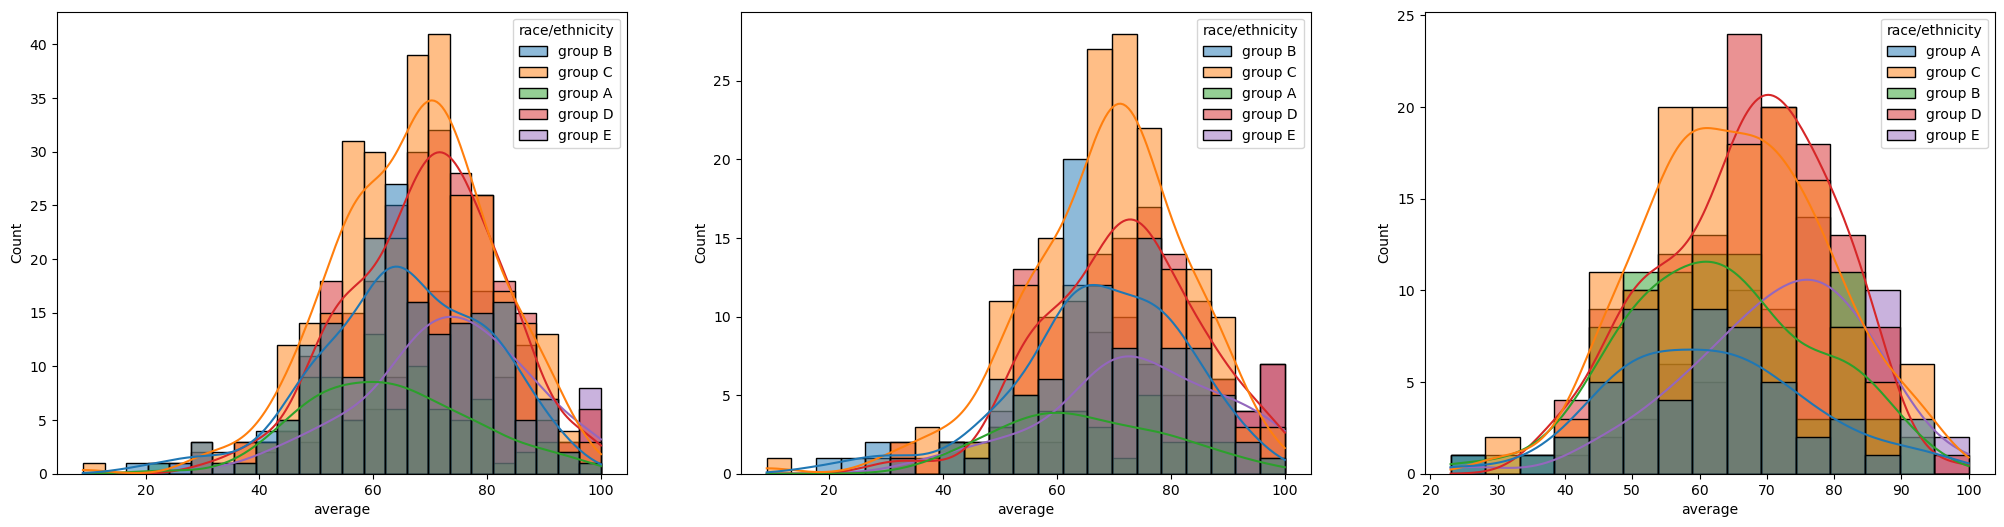

In [67]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

#### Observation
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

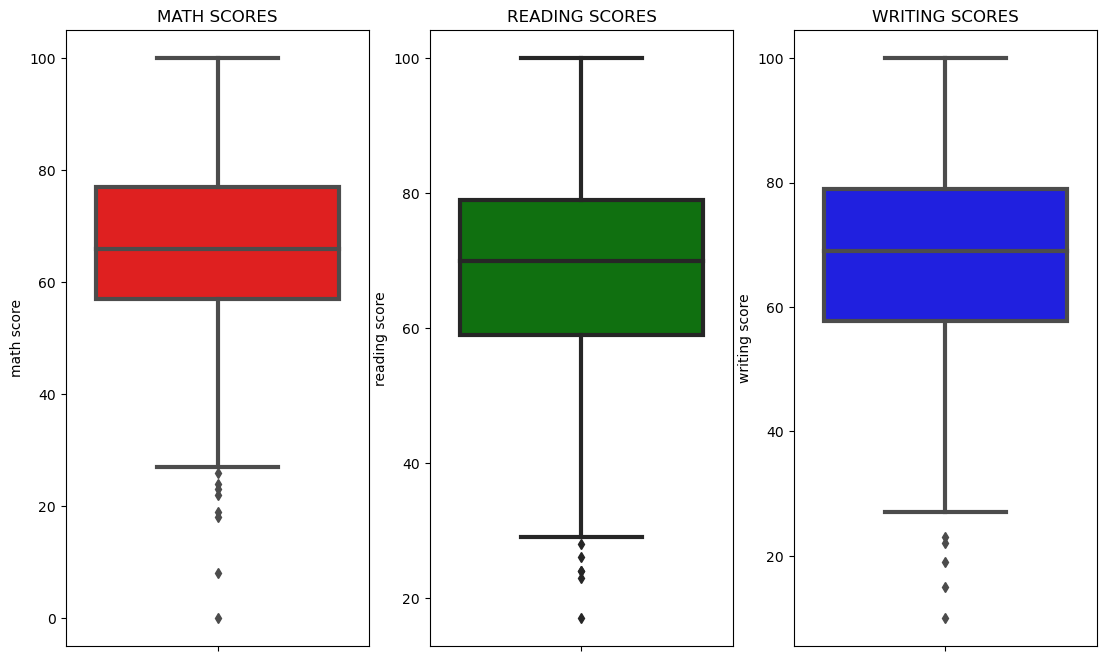

In [70]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.boxplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.boxplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.boxplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

#### Observation
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths 
whereas in reading and writing most of them score from 50-80

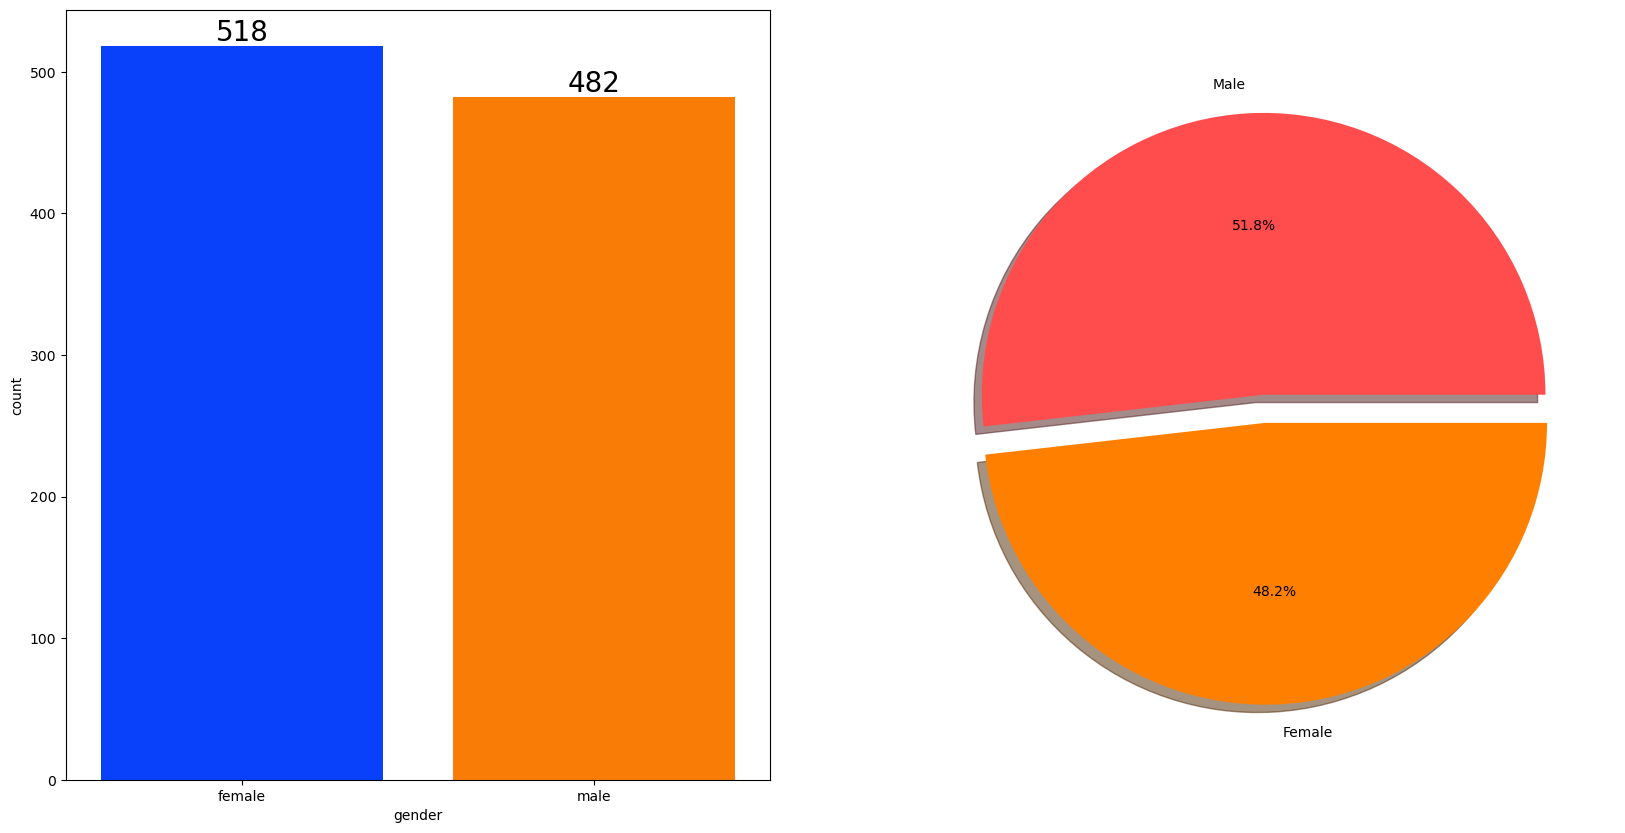

In [71]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

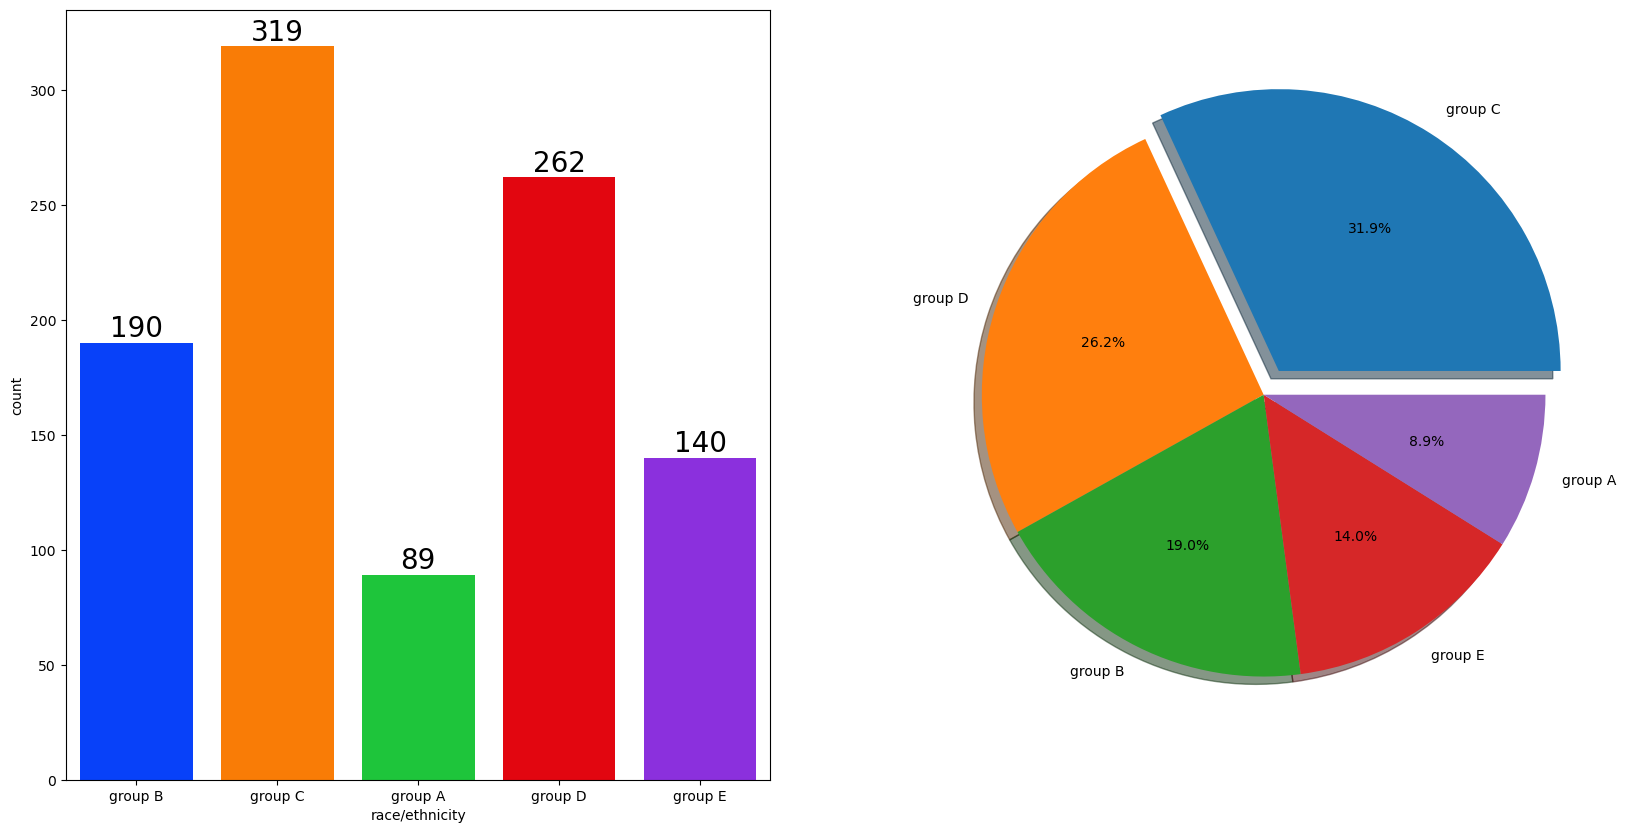

In [72]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

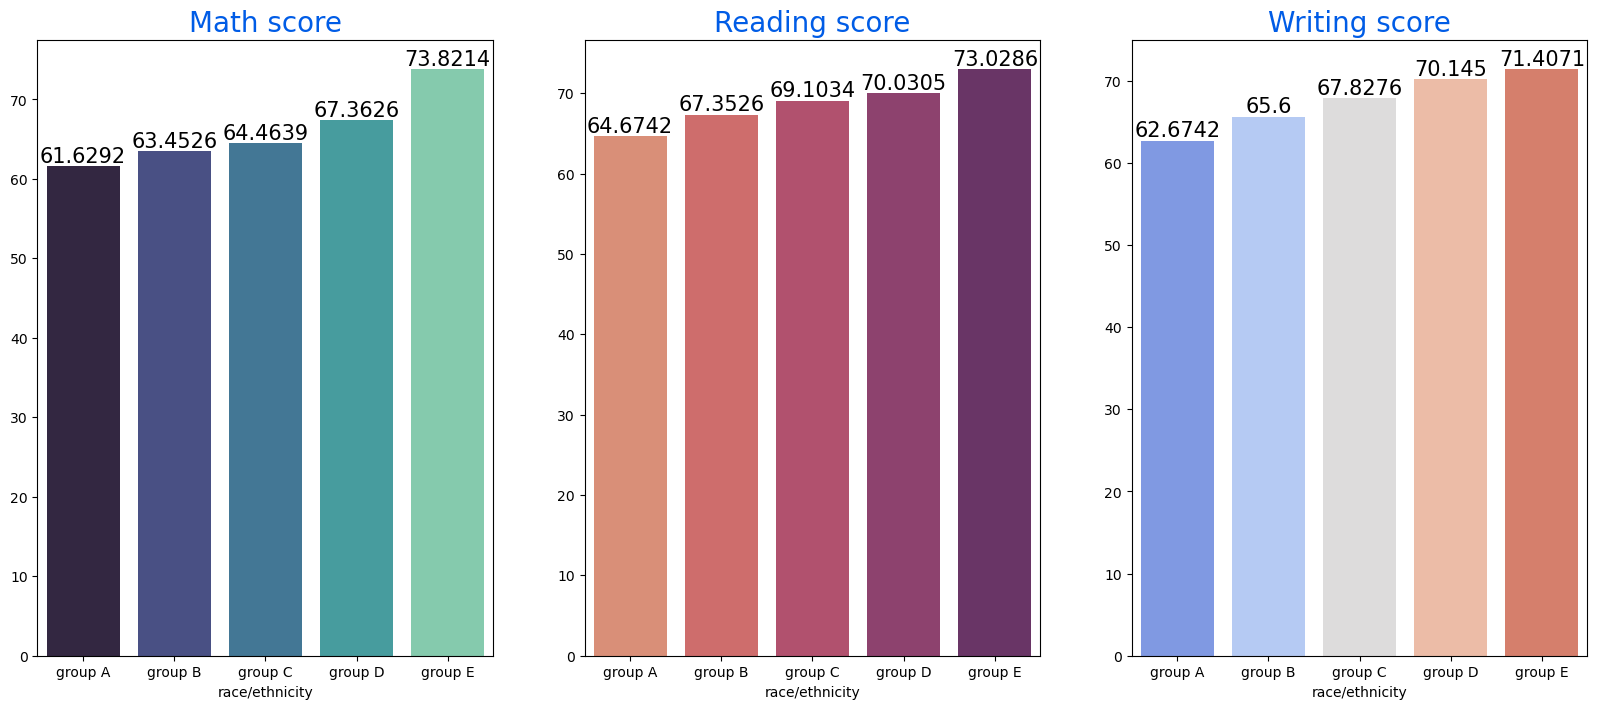

In [73]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Observation

- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

In [75]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

ValueError: could not convert string to float: "bachelor's degree"

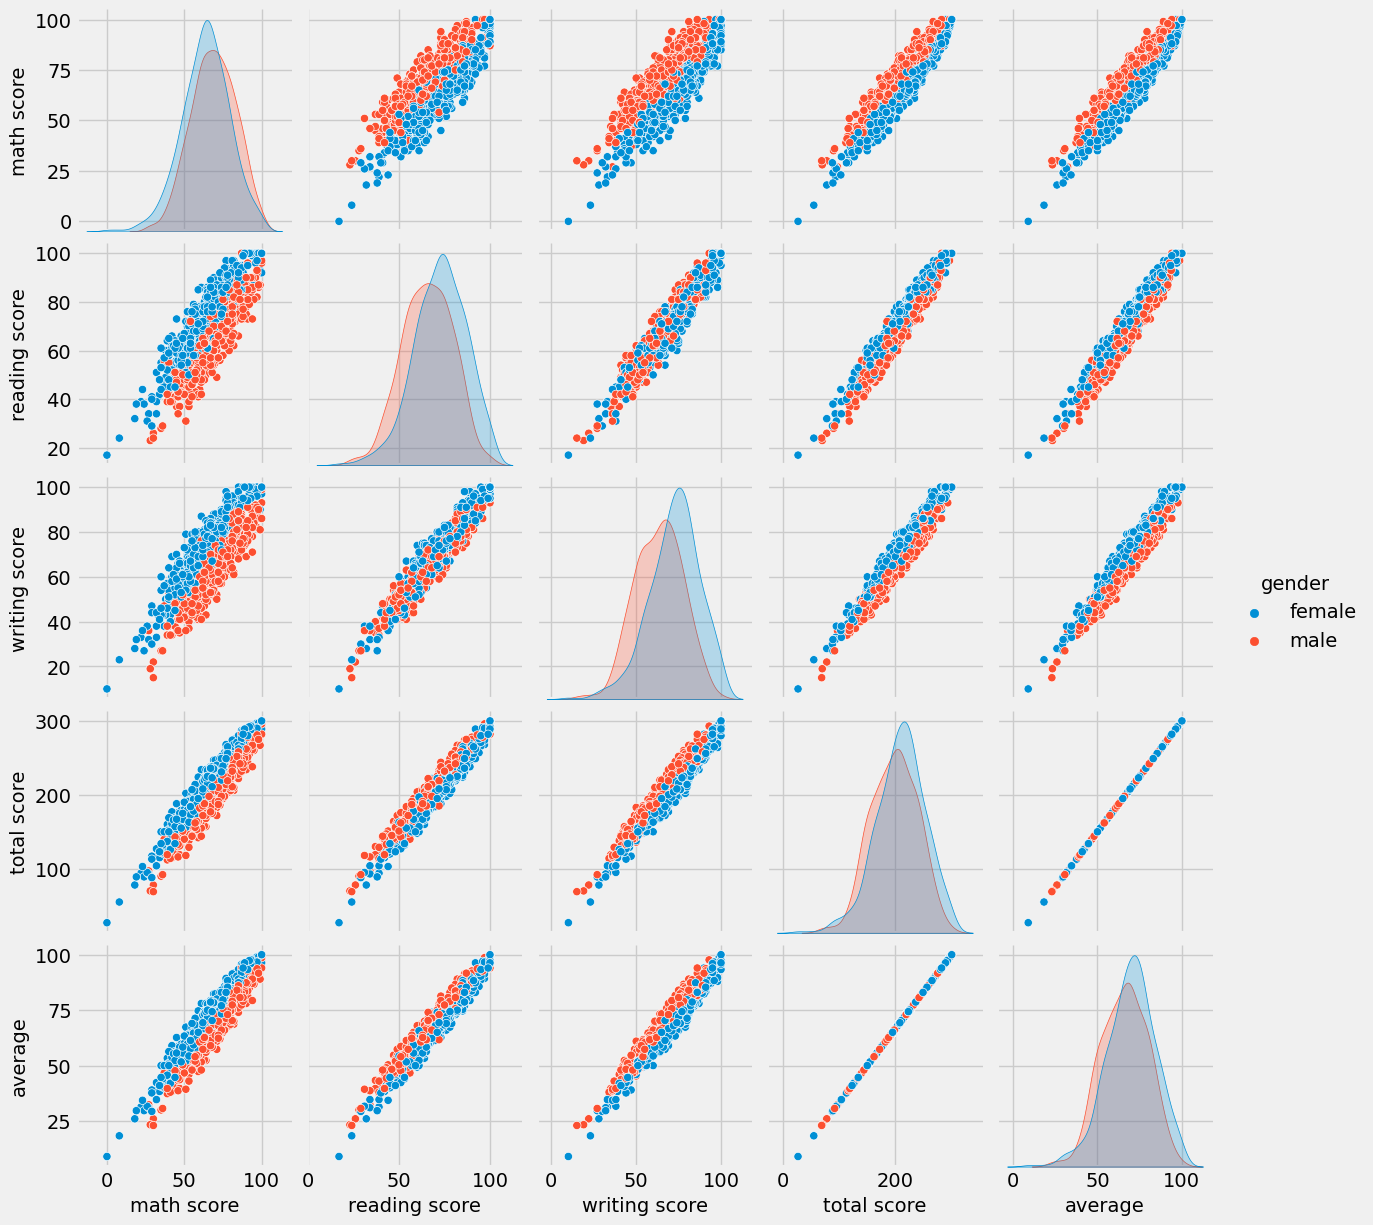

In [76]:
sns.pairplot(df,hue = 'gender')
plt.show()